In [47]:
from matplotlib import pyplot as plt
import dill
import pickle
import numpy as np

In [130]:
result_files_dill=['/localdata_ssd/juan/icra2018/cartpole/pilco_ssgp_rbf_1/results_40_20',
              '/localdata_ssd/juan/icra2018/cartpole/mc_pilco_dropout_rbf_3/results_40_20',
              '/localdata_ssd/juan/icra2018/cartpole/mcpilco_dropout_nn_4/results_40_20',
              '/localdata_ssd/juan/icra2018/cartpole/mc_pilco_lognormal_rbf_5/results_40_20',
              '/localdata_ssd/juan/icra2018/cartpole/mcpilco_dropout_dropoutnn_7/results_40_20']
result_files_pkl = ['/localdata_ssd/juan/icra2018/cartpole/mcpilco_lognormal_nn_6/results_40_20.pkl',
                   '/localdata_ssd/juan/icra2018/cartpole/mcpilco_lognormal_dropoutnn_8/results_40_20.pkl']

In [115]:
result_files_dill=['/localdata_ssd/juan/icra2018/cartpole/dcp_mcpilco_dropout_dropoutnn_7/results_45_20']
result_files_pkl = ['/localdata_ssd/juan/icra2018/cartpole/dcp_mcpilco_lognormal_dropoutnn_8/results_45_20.pkl']
ids = [0, 1]
names = ['DROPOUT-DYN_DROPOUT-POL', 'LOGNORMAL-DYN_DROPOUT-POL']

In [131]:
result_arrays = []
for rpath in result_files_dill:
    with open(rpath, 'rb') as f:
        result_arrays.append(dill.load(f))
for rpath in result_files_pkl:
    with open(rpath, 'rb') as f:
        result_arrays.append(pickle.load(f))        

In [132]:
ids = [0,1,2,4,3,5,6]
names = ['SSGP-DYN_RBF-POL (PILCO)', 'DROPOUT-DYN_RBF-POL', 'DROPOUT-DYN_MLP-POL',
         'LOGNORMAL-DYN_RBF-POL', 'DROPOUT-DYN_DROPOUT-POL', 'LOGNORMAL-DYN_MLP-POL',
         'LOGNORMAL-DYN_DROPOUT-POL']

In [133]:
# gather all costs
costs = [0]*len(ids)
for i in ids:
    name = names[i]
    results = result_arrays[i]
    
    costs_i = []
    
    #learning_iter
    for rj in results: 
        costs_ij = []
        #trial
        for r in rj:
            costs_ij.append(r[2])
        costs_i.append(costs_ij)
    
    costs_i = np.array(costs_i).squeeze()/30
    mean_sum_costs = costs_i.sum(-1).mean(-1)
    std_sum_costs = costs_i.sum(-1).std(-1)
    costs[i] = (name, mean_sum_costs, std_sum_costs)

In [134]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,9))
t = range(len(costs[0][1]))
for name, mean, std in costs:
    if name.find('RBF') > 0 or name.find('PILCO') > 0:
        pl, = plt.plot(t, mean, label=name, linewidth=2)
        alpha = 0.5
        for i in range(1,2):
            alpha = alpha*0.8
            lower_bound = mean - i*std
            upper_bound = mean + i*std
            plt.fill_between(t, lower_bound, upper_bound, alpha=alpha, color=pl.get_color())
plt.legend()
plt.xlabel('Number of interactions')
plt.ylabel('Average cost (over 20 runs)')

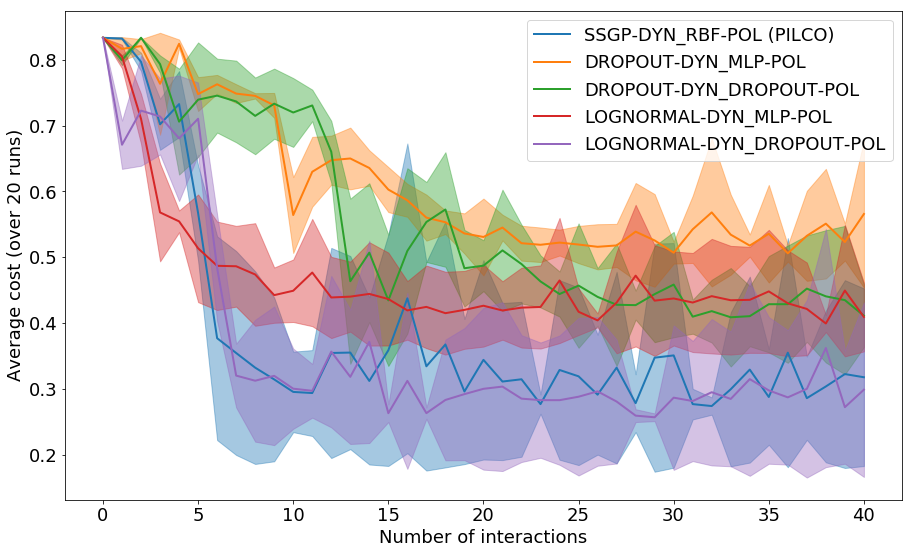

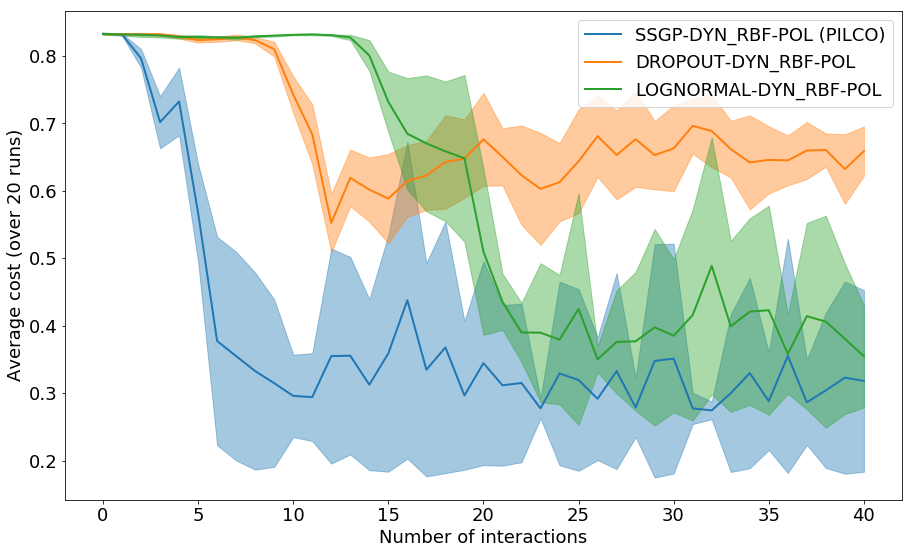

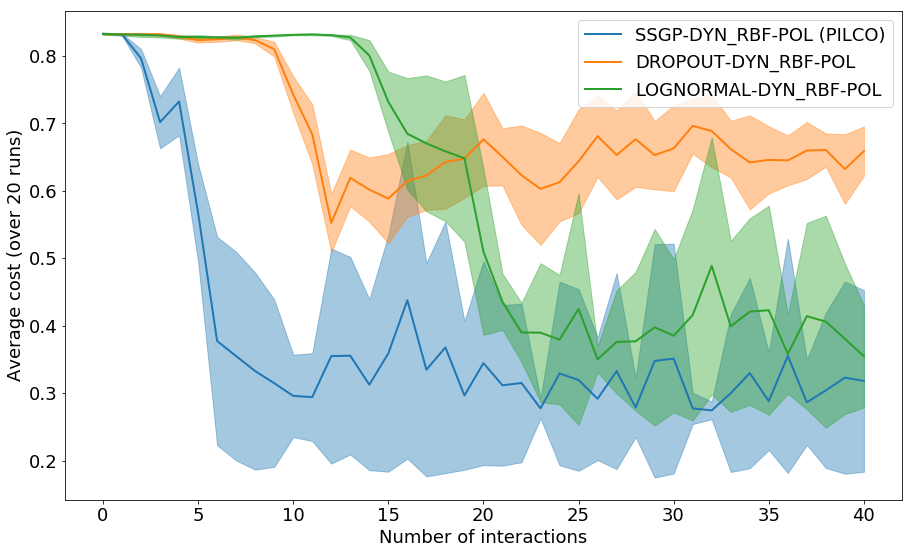

In [135]:
plt.show()